<a href="https://colab.research.google.com/github/DenZhid/TelecommunicationSystemsLabs/blob/main/Lab1/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Упражнение 1.1**
Прочитать пояснения и запустить примеры в https://colab.research.google.com/github/AllenDowney/ThinkDSP/blob/master/code/chap01.ipynb .

**Ход работы:**

По представленной ссылке была изучена работа примеров.


In [1]:
import os

if not os.path.exists('thinkdsp.py'):
  !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2022-03-07 12:39:30--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-03-07 12:39:30--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.02s   

2022-03-07 12:39:31 (2.86 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



# **Упражнение 1.2**

  Скачайте с сайта http://freesound.org образец звука, включающий музыку, речь или иные звуки, имеющие четко выраженную высоту. Выделите примерно полуcекундный сегмент, в котором высота постоянная. Вычислите и распечатайте спектр выбранного сегмента. Как связаны тембр звука и гармоническая структура, видимая в спектре?

  Используйте *high_pass*, *low_pass* и *band_stop* для фильтрации тех или иных гармоник. Затем преобразуйте спектры обратно в сигнал и послушайте его. Как звук соотноситься с изменениями, сделанными в спектре?

**Ход работы:**

В качестве исходного звука мною был выбран звук детской игрушки.


In [36]:
from thinkdsp import read_wave
if not os.path.exists('338986__drfx__music-box-melody-1.wav'):
  !wget https://github.com/DenZhid/TelecommunicationSystemsLabs/raw/main/Lab1/resources/338986__drfx__music-box-melody-1.wav

wave = read_wave('338986__drfx__music-box-melody-1.wav')
wave.normalize()
wave.make_audio()

Посмотрим на график звука.

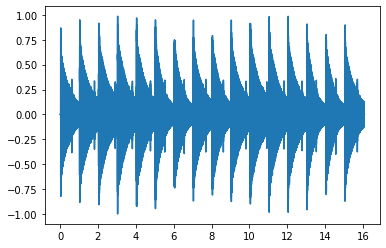

In [37]:
wave.plot()

Видим, что для наших целей примерно подходит временной промежутке от 0 до 0.5 с. Выделим его в отдельный сегмент.

In [38]:
segment = wave.segment(start=0, duration=0.5)
segment.make_audio()

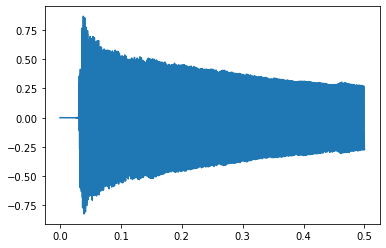

In [39]:
segment.plot()

Распечатаем спектр сегмента.

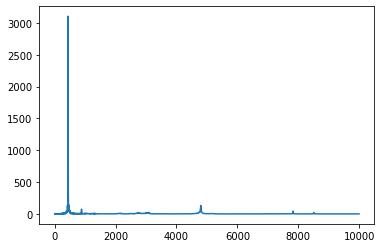

In [40]:
spectrum = segment.make_spectrum()
spectrum.plot(high=10000)

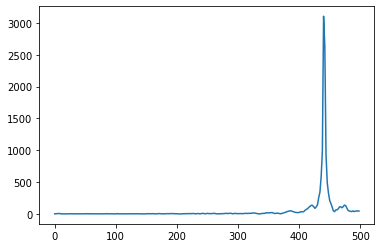

In [42]:
spectrum.plot(high=500)

In [41]:
spectrum.peaks()[:30]

[(3105.2774588882776, 440.0),
 (2643.91336339852, 442.0),
 (982.9510598236191, 438.0),
 (928.018195867917, 444.0),
 (581.1827879290163, 436.0),
 (488.8008118301294, 446.0),
 (340.42790675014993, 434.0),
 (326.9018494124598, 448.0),
 (256.52169521101825, 432.0),
 (210.32985553963465, 450.0),
 (163.0675958480812, 452.0),
 (141.98370455438047, 430.0),
 (138.47256175435174, 474.0),
 (135.5220113357201, 420.0),
 (133.4402047206871, 4800.0),
 (133.16144529881723, 422.0),
 (130.9784194813805, 476.0),
 (121.50761832575193, 4798.0),
 (120.22221745511368, 4802.0),
 (119.99141184463748, 418.0),
 (114.28077990027248, 4796.0),
 (112.9720584363705, 468.0),
 (112.72915819623454, 472.0),
 (111.28578585448173, 424.0),
 (111.10076052391359, 428.0),
 (110.35944145659276, 466.0),
 (110.25142863334469, 454.0),
 (109.79320052148987, 4804.0),
 (107.68634220841045, 4794.0),
 (104.87870928895984, 416.0)]

# **Упражнение 1.3**

Создайте сложный сигнал из объектов *SinSignal* и *CosSignal* суммируя их. Обработайте сигнал для получения *wave* и прослушайте его. Вычислите *Spectrum* и распечатайте. Что произойдёт при добавлении частотных компонент, не кратных основным?

In [30]:
from thinkdsp import CosSignal, SinSignal
from IPython.display import Audio

cos_sig = (CosSignal(freq=220, amp=2.0, offset=0) +
           CosSignal(freq=880, amp=1.0, offset=0))
sin_sig = (SinSignal(freq=550, amp=0.5, offset=1.5) +
           SinSignal(freq=1100, amp=1.5, offset=1.5))

mix = sin_sig + cos_sig
wave = mix.make_wave(duration=2, start=0, framerate=11025)
wave.make_audio()

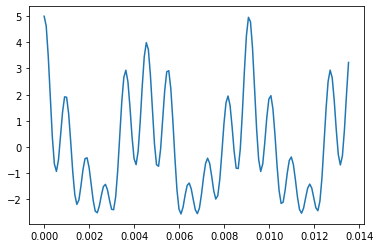

In [31]:
mix.plot()

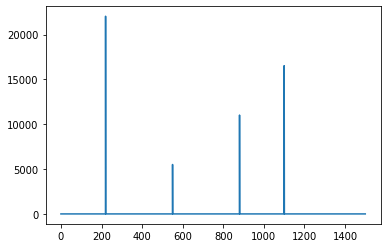

In [33]:
spectrum = wave.make_spectrum()
spectrum.plot(high=1500)

# **Упражнени 1.4**

Напишите функцию *stretch*, берущую *wave* и коэффициент изменения. Она должна ускорять или замедлять сигнал изменением *ts* и *framerate*. Подсказака: должно получиться всего две строки кода.